In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Importing Data Sets

## data.csv

In [2]:
data = pd.read_csv('data.csv')
data.head()

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.995,['Carl Woitschach'],0.708,158648,0.1950,0,6KbQ3uYMLKb5jDxLF7wYDD,0.563,10,0.1510,-12.428,1,Singende Bataillone 1. Teil,0,1928,0.0506,118.469,0.7790,1928
1,0.994,"['Robert Schumann', 'Vladimir Horowitz']",0.379,282133,0.0135,0,6KuQTIu1KoTTkLXKrwlLPV,0.901,8,0.0763,-28.454,1,"Fantasiestücke, Op. 111: Più tosto lento",0,1928,0.0462,83.972,0.0767,1928
2,0.604,['Seweryn Goszczyński'],0.749,104300,0.2200,0,6L63VW0PibdM1HDSBoqnoM,0.000,5,0.1190,-19.924,0,Chapter 1.18 - Zamek kaniowski,0,1928,0.9290,107.177,0.8800,1928
3,0.995,['Francisco Canaro'],0.781,180760,0.1300,0,6M94FkXd15sOAOQYRnWPN8,0.887,1,0.1110,-14.734,0,Bebamos Juntos - Instrumental (Remasterizado),0,1928-09-25,0.0926,108.003,0.7200,1928
4,0.990,"['Frédéric Chopin', 'Vladimir Horowitz']",0.210,687733,0.2040,0,6N6tiFZ9vLTSOIxkj8qKrd,0.908,11,0.0980,-16.829,1,"Polonaise-Fantaisie in A-Flat Major, Op. 61",1,1928,0.0424,62.149,0.0693,1928


## data_by_artist.csv

In [3]:
data_by_artist = pd.read_csv('data_by_artist.csv')
data_by_artist.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9


## data_by_genres.csv

In [4]:
data_by_genres = pd.read_csv('data_by_genres.csv')
data_by_genres.head()

,genres,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,432hz,0.494780,0.299333,1.048887e+06,0.450678,0.477762,0.131000,-16.854000,0.076817,120.285667,0.221750,52.166667,5,1
1,[],0.679245,0.521473,2.298526e+05,0.401522,0.196737,0.221586,-12.679076,0.112267,112.025168,0.515920,21.682005,7,1
2,a cappella,0.621532,0.577017,1.936522e+05,0.345694,0.003799,0.127087,-12.770211,0.095324,111.813230,0.453186,43.351819,11,1
3,abstract,0.359395,0.459500,3.430185e+05,0.487000,0.791400,0.119480,-14.092000,0.043420,124.743200,0.304990,41.500000,1,1
4,abstract beats,0.353347,0.694400,2.338244e+05,0.613400,0.349403,0.102453,-6.699800,0.143453,119.398400,0.634187,58.600000,10,0


## data_by_year.csv

In [5]:
data_by_year = pd.read_csv('data_by_year.csv')
data_by_year.head()

,year,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode
0,1921,0.895823,0.425661,229911.914062,0.236784,0.322330,0.215814,-17.095437,0.077258,100.397758,0.425495,0.351562,7,1
1,1922,0.939236,0.480000,167904.541667,0.237026,0.440470,0.238647,-19.179958,0.115419,101.376139,0.534056,0.138889,10,1
2,1923,0.976329,0.568462,178356.301775,0.246936,0.401932,0.236656,-14.373882,0.098619,112.456598,0.624788,5.727811,0,1
3,1924,0.935575,0.548654,188461.649789,0.347033,0.583955,0.237875,-14.202304,0.090210,120.653359,0.668574,0.603376,10,1
4,1925,0.965422,0.571890,184130.699620,0.264373,0.408893,0.243094,-14.516707,0.115457,115.671715,0.616430,2.707224,5,1


## data_w_genres.csv 

In [6]:
data_w_genres = pd.read_csv('data_w_genres.csv')
data_w_genres.head()

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
0,"""Cats"" 1981 Original London Cast",0.575083,0.442750,247260.000000,0.386336,0.022717,0.287708,-14.205417,0.180675,115.983500,0.334433,38.000000,5,1,12,['show tunes']
1,"""Cats"" 1983 Broadway Cast",0.862538,0.441731,287280.000000,0.406808,0.081158,0.315215,-10.690000,0.176212,103.044154,0.268865,33.076923,5,1,26,[]
2,"""Fiddler On The Roof” Motion Picture Chorus",0.856571,0.348286,328920.000000,0.286571,0.024593,0.325786,-15.230714,0.118514,77.375857,0.354857,34.285714,0,1,7,[]
3,"""Fiddler On The Roof” Motion Picture Orchestra",0.884926,0.425074,262890.962963,0.245770,0.073587,0.275481,-15.639370,0.123200,88.667630,0.372030,34.444444,0,1,27,[]
4,"""Joseph And The Amazing Technicolor Dreamcoat""...",0.605444,0.437333,232428.111111,0.429333,0.037534,0.216111,-11.447222,0.086000,120.329667,0.458667,42.555556,11,1,9,[]


In [7]:
genres_list = data_w_genres["genres"].tolist()
genres_list

["['show tunes']",
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 '[]',
 "['antiviral pop', 'comedy rock', 'comic', 'parody']",
 '[]',
 "['east coast hip hop', 'gangster rap', 'hardcore hip hop', 'hip hop', 'rap']",
 '[]',
 "['dark trap', 'new orleans rap', 'underground hip hop']",
 '[]',
 "['broadway', 'show tunes']",
 "['broadway', 'hollywood', 'show tunes']",
 "['show tunes']",
 '[]',
 "['boston rock', 'dance rock', 'new romantic', 'new wave', 'new wave pop']",
 "['latin', 'puerto rican pop', 'reggaeton', 'trap latino']",
 '[]',
 '[]',
 "['k-pop', 'k-pop girl group']",
 "['alternative metal', 'industrial metal', 'nu metal', 'post-grunge', 'rap metal', 'rap rock']",
 "['boy band', 'dance pop', 'europop', 'pop']",
 '[]',
 "['alternative pop rock', 'neon pop punk', 'pop emo', 'pop punk', 'texas pop punk']",
 "['alternative rock', 'dance-punk', 'indie rock', 'lo-fi', 'modern rock', 'post-hardcore']",
 '[]',
 "['cali rap', 'melodic rap', 'trap', 'underground hip hop', 'vapor trap']",


In [8]:
genres_list = ['hip hop', 'hip-hop', 'rap']

# this line loads rows that only have the string in genres_list under the data frames "genres" column. 
#Thus sorting the data frame only for genres that fall under hip hop / rap
hiphop_data = data_w_genres[data_w_genres.genres.str.contains('|'.join(genres_list ))]
hiphop_data

,artists,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,key,mode,count,genres
11,$NOT,0.547000,0.750125,152929.500000,0.519750,4.313714e-02,0.213975,-8.878500,0.276725,114.229125,0.319500,64.625000,6,1,8,"['east coast hip hop', 'gangster rap', 'hardco..."
13,$uicideBoy$,0.128123,0.765246,147549.442623,0.641705,3.845447e-02,0.201195,-6.626918,0.155917,119.804361,0.296096,61.647541,1,1,122,"['dark trap', 'new orleans rap', 'underground ..."
20,((( O ))),0.847000,0.410000,311837.000000,0.169000,3.270000e-03,0.117000,-11.422000,0.048500,89.494000,0.208000,66.000000,3,1,2,"['latin', 'puerto rican pop', 'reggaeton', 'tr..."
24,(Hed) P.E.,0.011631,0.589200,253677.400000,0.879200,2.026000e-06,0.171120,-5.259800,0.172140,134.969400,0.427000,45.800000,2,1,10,"['alternative metal', 'industrial metal', 'nu ..."
30,03 Greedo,0.069320,0.724600,220595.200000,0.693800,8.000000e-07,0.165060,-5.021000,0.050740,93.907800,0.443400,59.200000,1,0,5,"['cali rap', 'melodic rap', 'trap', 'undergrou..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27237,slowthai,0.085100,0.641000,221386.000000,0.807000,2.380000e-05,0.640000,-6.730000,0.239000,158.071000,0.712000,58.000000,9,1,1,"['grime', 'hip hop', 'rap', 'uk alternative hi..."
27253,will.i.am,0.096940,0.793289,238907.342105,0.725605,2.181658e-05,0.160832,-6.438474,0.114013,119.138947,0.680868,53.289474,7,0,38,"['dance pop', 'pop', 'pop rap', 'post-teen pop']"
27259,zebrahead,0.002543,0.486000,198123.250000,0.966750,1.000000e-05,0.318750,-4.733000,0.155050,148.474500,0.472250,51.000000,0,1,8,"['funk metal', 'pop punk', 'punk', 'rap rock',..."
27272,Ñejo,0.324667,0.800000,225976.000000,0.680000,1.100000e-02,0.080333,-6.817333,0.179567,120.394333,0.900000,62.333333,6,0,3,"['latin', 'latin hip hop', 'perreo', 'reggaeto..."


# Plotting Data

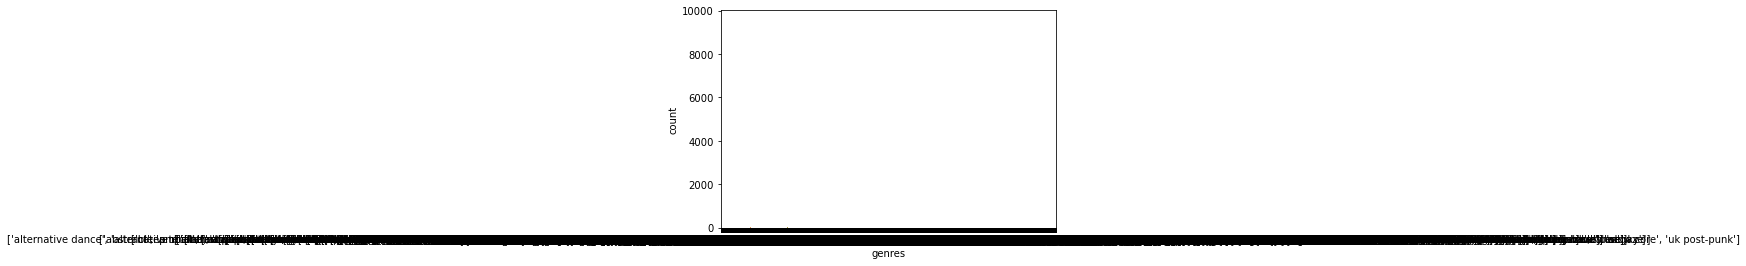

In [9]:
ax = sns.countplot(data=data_w_genres, x="genres")
ax

(array([  1.,   0.,   2.,   0.,   2.,   0.,   4.,   1.,   2.,   4.,   5.,
          3.,   7.,   7.,  12.,  18.,  13.,  15.,  16.,  21.,  32.,  35.,
         49.,  40.,  48.,  53.,  69.,  64.,  63.,  91.,  92., 113., 113.,
        117., 166., 135., 132., 134., 139., 127., 105.,  74.,  54.,  64.,
         39.,  33.,  15.,  18.,   6.,   4.]),
 array([0.138  , 0.15496, 0.17192, 0.18888, 0.20584, 0.2228 , 0.23976,
        0.25672, 0.27368, 0.29064, 0.3076 , 0.32456, 0.34152, 0.35848,
        0.37544, 0.3924 , 0.40936, 0.42632, 0.44328, 0.46024, 0.4772 ,
        0.49416, 0.51112, 0.52808, 0.54504, 0.562  , 0.57896, 0.59592,
        0.61288, 0.62984, 0.6468 , 0.66376, 0.68072, 0.69768, 0.71464,
        0.7316 , 0.74856, 0.76552, 0.78248, 0.79944, 0.8164 , 0.83336,
        0.85032, 0.86728, 0.88424, 0.9012 , 0.91816, 0.93512, 0.95208,
        0.96904, 0.986  ]),
 <a list of 50 Patch objects>)

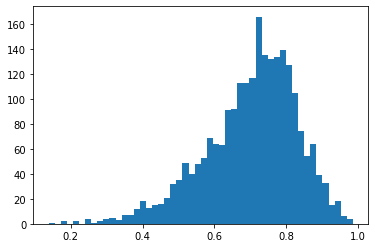

In [20]:
dance = hiphop_data['danceability']

plot.hist(hiphop_data['danceability'], bins=50)